## Exploratory Data Analysis (Part - 2)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('tel_churn.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## Bivariate Analysis

In [3]:
pd.crosstab(df['churn'], df['international plan'], margins=True)

international plan,no,yes,All
churn,,,
False,2664,186,2850
True,346,137,483
All,3010,323,3333


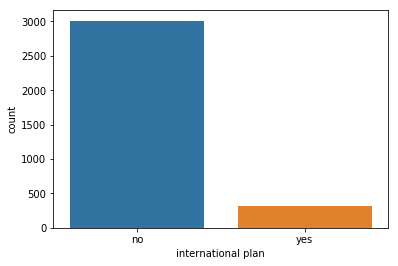

In [4]:
sns.countplot(x='international plan', data=df)

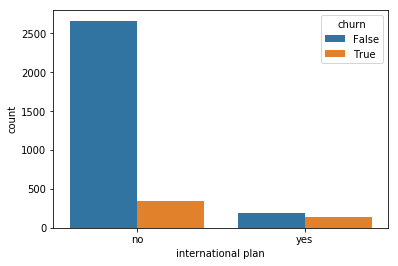

In [5]:
sns.countplot(x='international plan', data=df, hue='churn')

<b>OBSERVATIONS: </b>We see that, with international plans the churn rate is much higher

In [6]:
pd.crosstab(df['churn'], df['customer service calls'], margins=True)

customer service calls,0,1,2,3,4,5,6,7,8,9,All
churn,,,,,,,,,,,
False,605,1059,672,385,90,26,8,4,1,0,2850
True,92,122,87,44,76,40,14,5,1,2,483
All,697,1181,759,429,166,66,22,9,2,2,3333


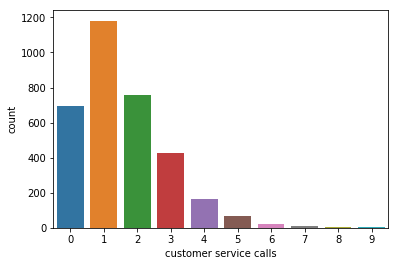

In [7]:
sns.countplot(x='customer service calls', data=df)

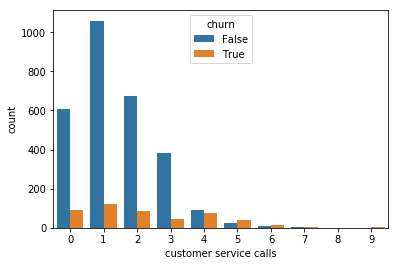

In [8]:
sns.countplot(x='customer service calls', data=df, hue='churn')

<b>OBSERVATIONS: </b>Clearly, churn rate increases starting from 4 calls to service center.

In [9]:
# is_csc_gt_three -> Is Customer service calls greater than 3?

df['is_csc_gt_three'] = (df['customer service calls']>3).astype('int')

df['is_csc_gt_three'].value_counts()

0    3066
1     267
Name: is_csc_gt_three, dtype: int64

In [10]:
pd.crosstab(df['is_csc_gt_three'], df['churn'], margins=True)

churn,False,True,All
is_csc_gt_three,,,
0,2721,345,3066
1,129,138,267
All,2850,483,3333


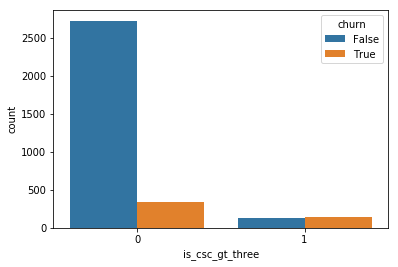

In [11]:
sns.countplot(x='is_csc_gt_three', data=df, hue='churn')

<b>OBSERVATIONS: </b> When the number of calls to the service center is greater than 3 and the international plan is added, we might expect more Churn Rate.

c:\users\kanav\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
c:\users\kanav\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


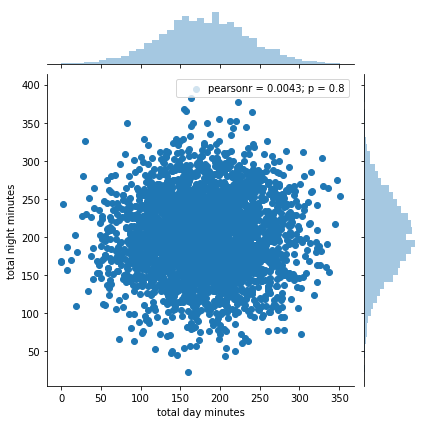

In [12]:
sns.jointplot(x='total day minutes', y='total night minutes',\
              data=df, kind='scatter')

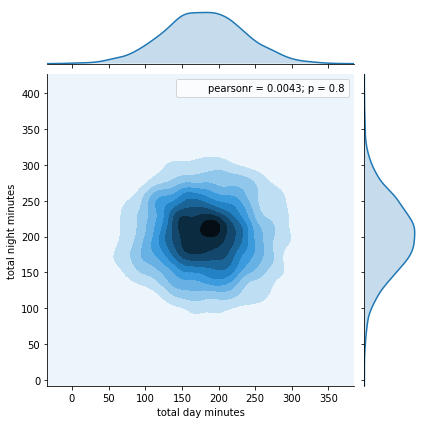

In [13]:
sns.jointplot(x='total day minutes', y='total night minutes',\
              data=df, kind='kde')

## Multivariate Analysis

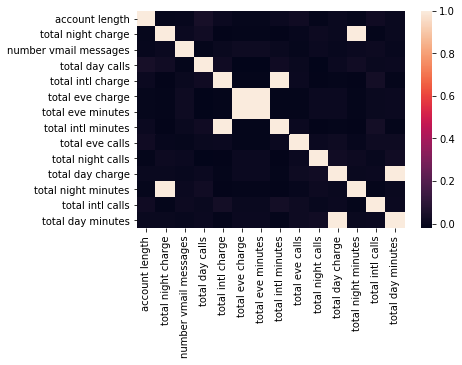

In [14]:
num_features = list(set(df.columns)-set(['state', 'international plan',\
                                  'voice mail plan', 'area code',\
                                  'churn', 'customer service calls',\
                                        'is_csc_gt_three']))

cor_mat = df[num_features].corr()

sns.heatmap(cor_mat)

<b>OBSERVATIONS: </b>We can see that there are 4 variables('total day charge', 'total eve charge', 'total night charge', 'total intl charge') that are calculated directly from the number of minutes spent on the phone calls. These are called dependent variables and can therefore be left out since they do not contribute any additional information.

c:\users\kanav\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
c:\users\kanav\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


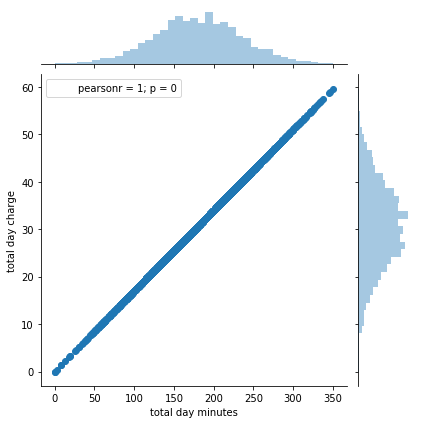

In [15]:
sns.jointplot(x='total day minutes', y='total day charge',\
              data=df, kind='scatter')

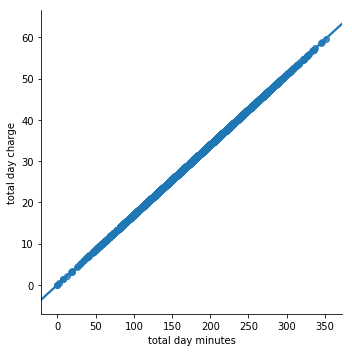

In [16]:
sns.lmplot('total day minutes', 'total day charge', data=df)

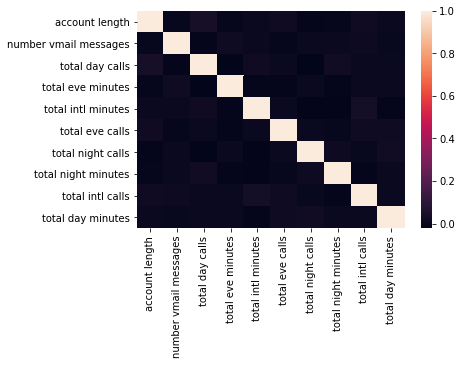

In [17]:
num_features = list(set(num_features)-set(['total day charge', 'total eve charge',\
                                          'total night charge', 'total intl charge']))

cor_mat = df[num_features].corr()

sns.heatmap(cor_mat)

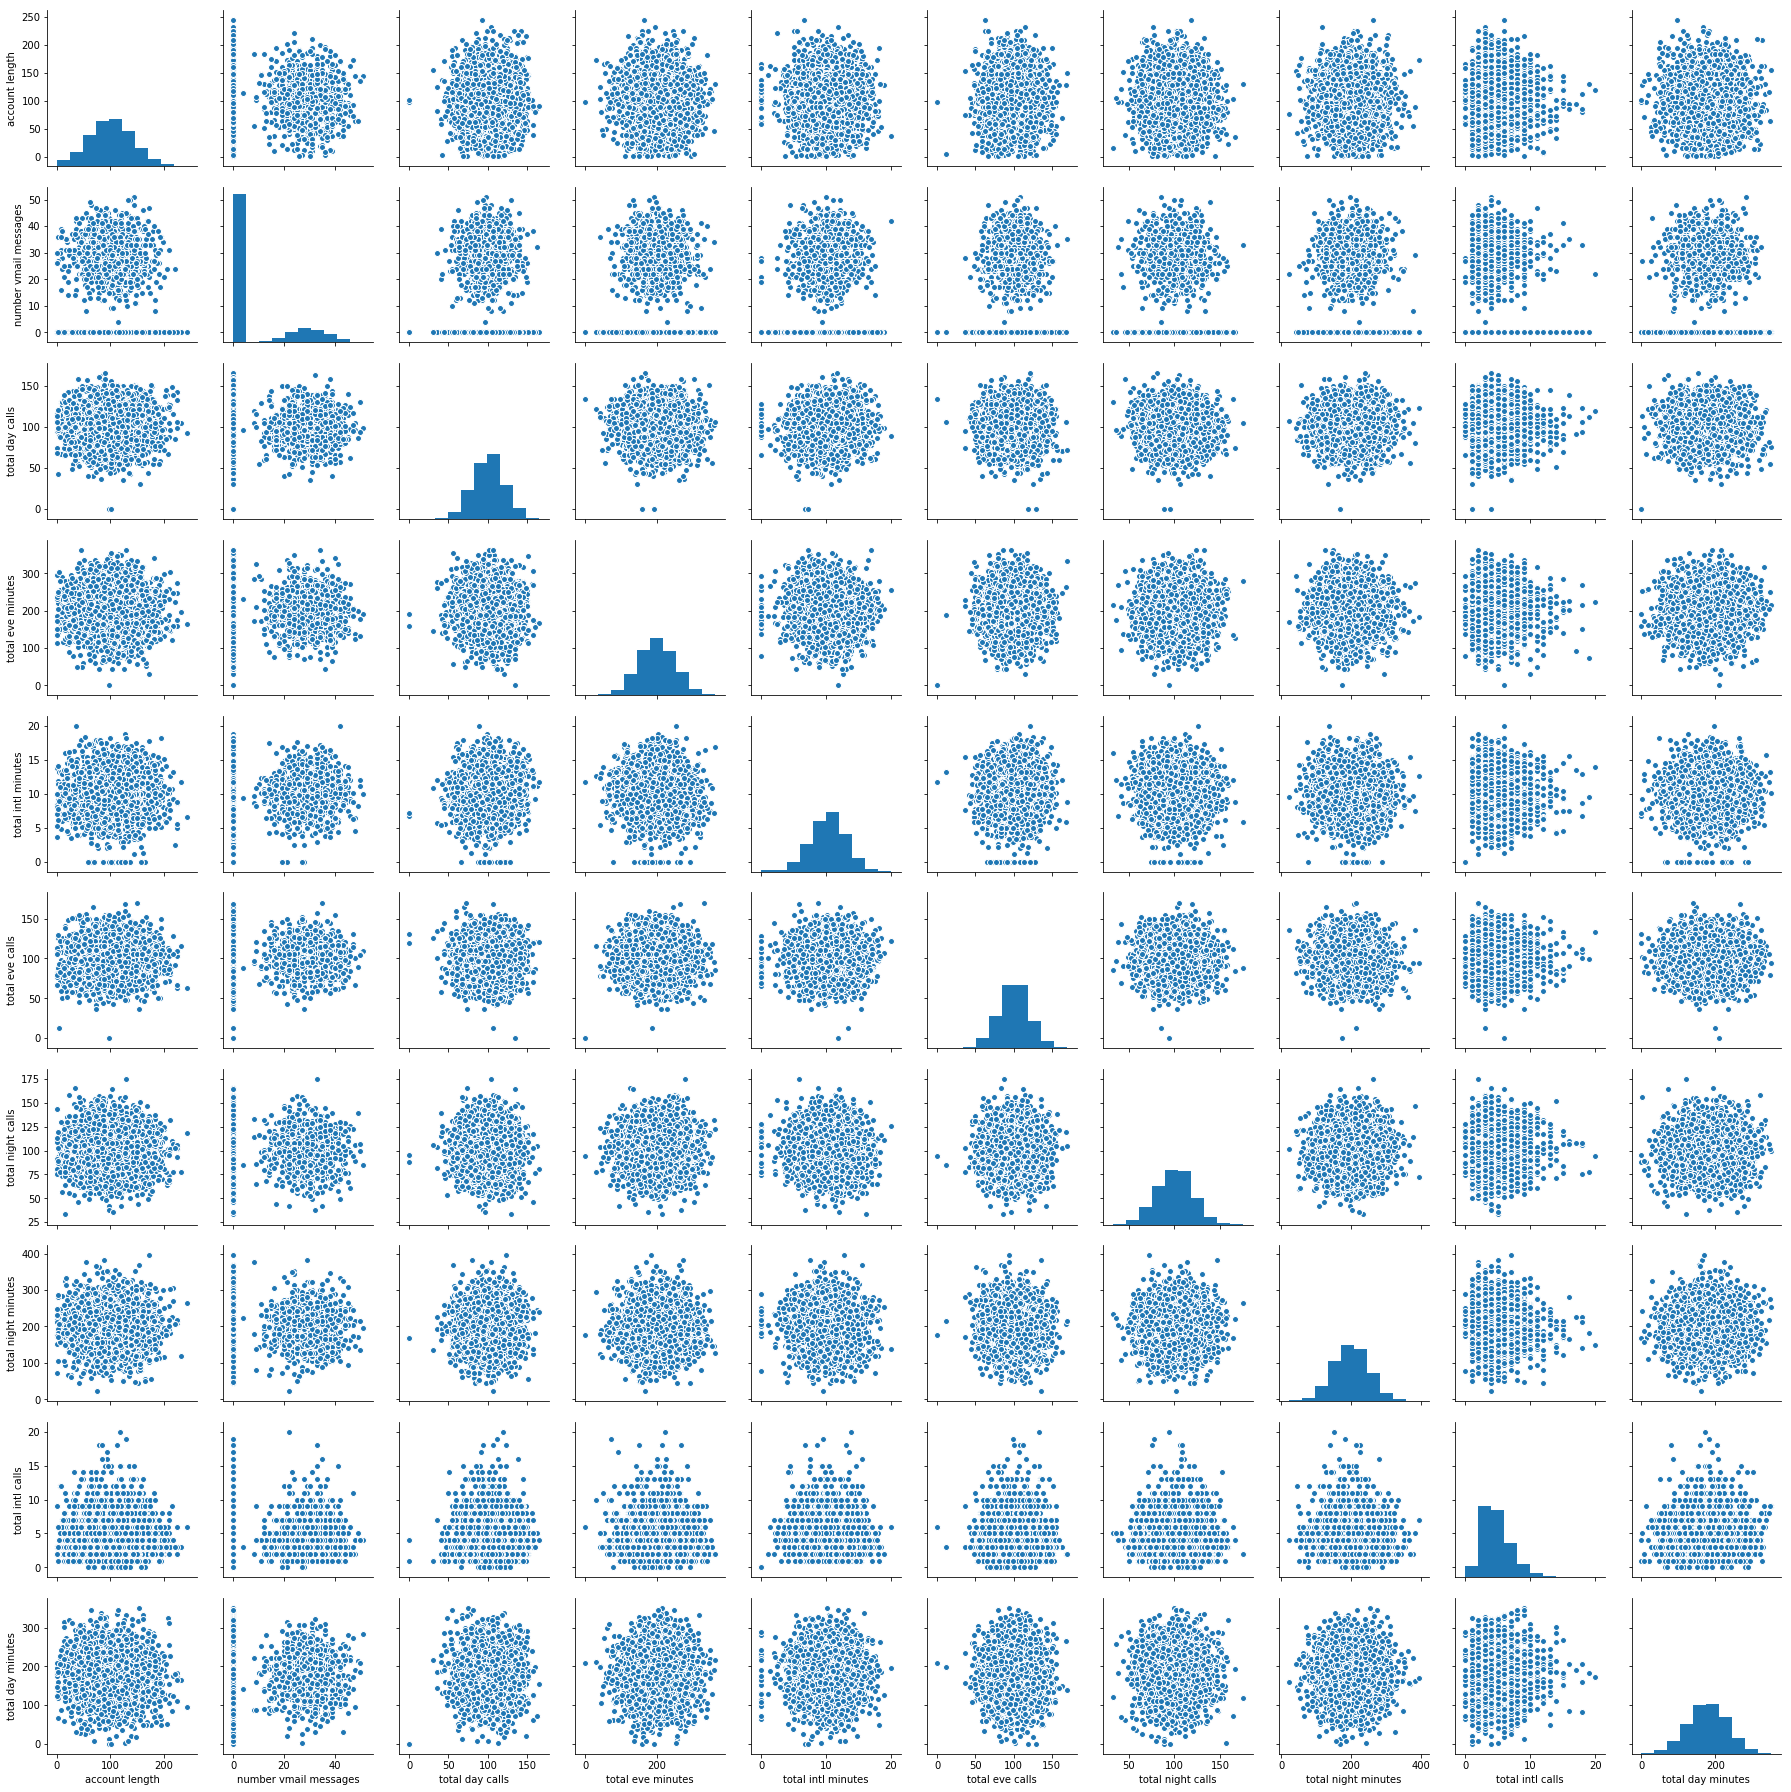

In [18]:
sns.pairplot(df[num_features])

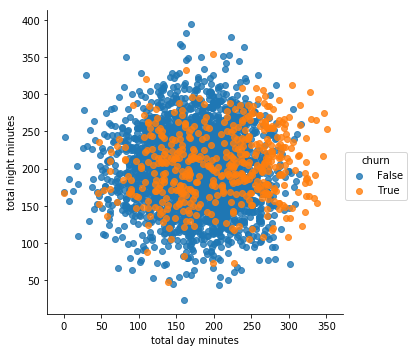

In [19]:
sns.lmplot('total day minutes', 'total night minutes', data=df,\
          hue='churn', fit_reg=False)

In [20]:
num_features

['account length',
 'number vmail messages',
 'total day calls',
 'phone number',
 'total eve minutes',
 'total intl minutes',
 'total eve calls',
 'total night calls',
 'total night minutes',
 'total intl calls',
 'total day minutes']

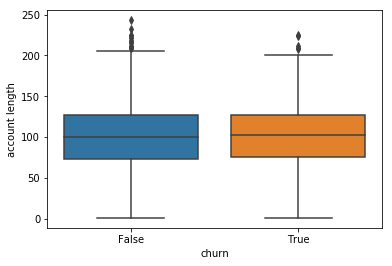

In [28]:
sns.boxplot(x='churn', y='account length', data=df)

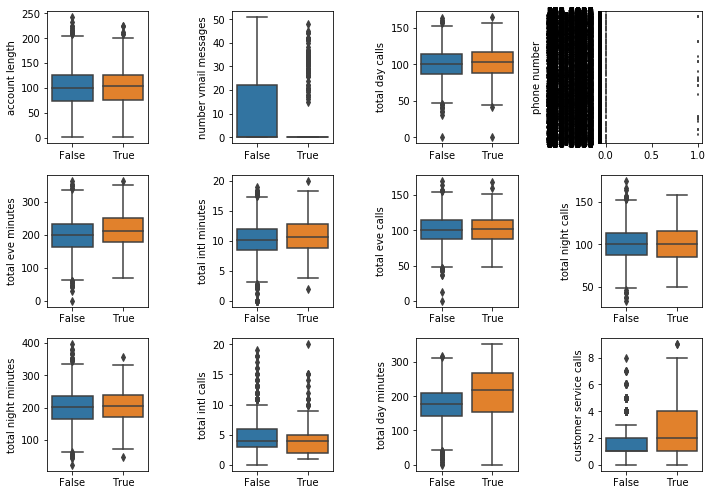

In [29]:
num_features.append('customer service calls')

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7))

for idx, feature in enumerate(num_features):
    ax = axes[int(idx/4), idx%4]
    sns.boxplot(x='churn', y=feature, data=df, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel(feature)
fig.tight_layout()

<b>OBSERVATIONS: </b>
1. We can observe that greatest discrepancy in the plot is for 'number vmail messages', 'total day minutes' and 'customer service calls'.

2. On average, customers that discontinue their contracts are more active users of telecom services. Perhaps they are unhappy with the tariffs, so a possible measure to prevent churn could be a reduction in call rates.



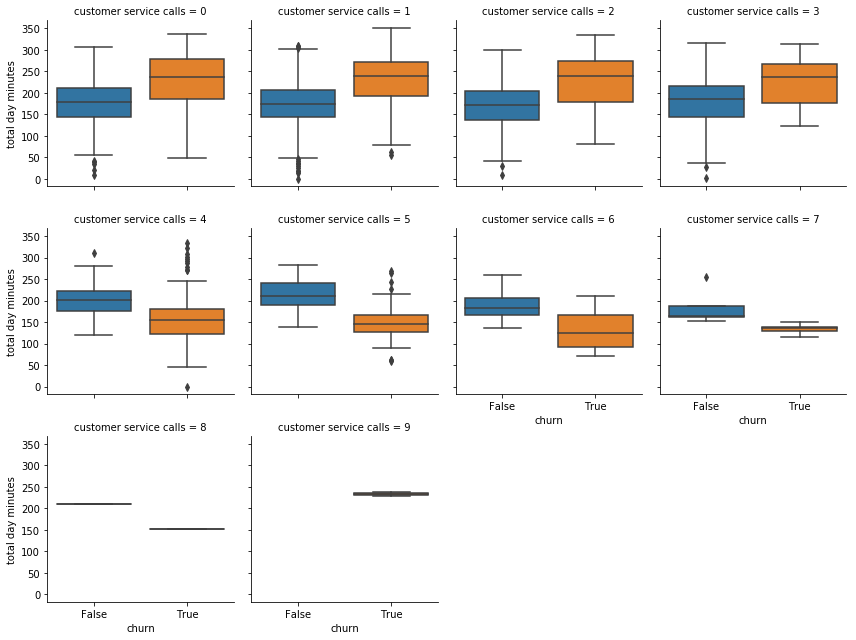

In [31]:
sns.factorplot(x='churn', y='total day minutes', col='customer service calls', \
              data=df, kind='box', col_wrap=4, size=3)

## Summary

1. 'customer service calls' and 'international plan' are strongest features. 

2. Customers with international plans have much higher churn rate.

3. Customers who called more than or equal to 4 times for service support have higher churn rate.

4. On average, customers that discontinue their contracts are more active users of telecom services. Perhaps they are unhappy with the tariffs, so a possible measure to prevent churn could be a reduction in call rates.